# Notebook to visualize protein predictions

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpl_patches
import matplotlib.ticker as ticker
from scipy import interpolate
from mpl_toolkits.axes_grid1 import Divider, Size

# Patch class

In [35]:
class StructureBase(object):
    def __init__(self, width, height, length, linewidth):
        self.width = width
        self.height = height
        self.length = length
        self.linewidth = linewidth
            
class Helix(StructureBase):    
    def draw(self, ax, start, last):
        last+=1
        
        n_turns = np.ceil((last - start))*0.5
        x_val = np.linspace(0, n_turns * 2*np.pi, 100)
        y_val = (-0.4*np.sin(x_val) + 1) / 2

        x_val *= (last - start) / (n_turns * 2*np.pi)
        x_val += start
        y_val *= self.height
        y_val += 0
            
        origin = (start, 0)

        pos_signal = y_val.copy()
        neg_signal = y_val.copy()
            
        pos_signal_filter = np.diff(pos_signal, prepend=[0])
        neg_signal_filter = np.diff(neg_signal, prepend=[0])
            
        pos_signal[pos_signal_filter <= 0.01] = np.nan
        neg_signal[neg_signal_filter >= 0.01] = np.nan
        
        ax.fill_between(x_val,neg_signal-0.3,neg_signal+0.3, color="orange")
        ax.fill_between(x_val,pos_signal-0.3,pos_signal+0.3, color="coral")
            
            
class Sheet(StructureBase):
    def draw(self, ax, start, last):
        # Draw arrow
        self.length = last - start + 1
        tail_height = self.width * 2/3
        head_height = self.width

        e = mpl_patches.FancyArrow(start, 1.5,
                                   self.length+0.2, 0, 
                                   length_includes_head=True,
                                   head_length=0.5,
                                   head_width=1.5,
                                   width=self.width,
                                   facecolor="indigo",
                                   edgecolor="indigo",
                                   linewidth=1.0,
                                   zorder=98)
        ax.add_patch(e)
    
class Coil(StructureBase):
    def draw(self, ax, start, last):
        # Draw turn as thin arc
        self.height = self.width
        self.length = (last - start) + 1
        
        origin = (start, 1.425 + (self.height / 2))
        
        e = mpl_patches.Rectangle(xy=origin, 
                                  width=self.length, 
                                  height=self.height, 
                                  linewidth=self.linewidth, 
                                  color="m",
                                  zorder=99)
        ax.add_patch(e)

# Drawing of the plot

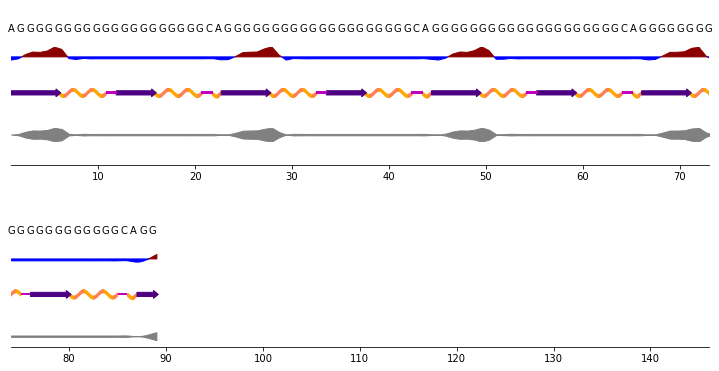

In [258]:

example= [
    ["A", "H", 0.0],
    ["G", "B", 0.20],
    ["G", "B", 0.60],
    ["G", "B", 0.60],
    ["G", "B", 0.80],
    ["G", "B", 1.0],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "C", 0.10],
    ["G", "B", 0.10],
    ["G", "B", 0.10],
    ["G", "B", 0.10],
    ["G", "B", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["C", "C", 0.10],
    ["A", "H", 0.0],
    ["G", "B", 0.20],
    ["G", "B", 0.60],
    ["G", "B", 0.60],
    ["G", "B", 0.80],
    ["G", "B", 1.0],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "C", 0.10],
    ["G", "B", 0.10],
    ["G", "B", 0.10],
    ["G", "B", 0.10],
    ["G", "B", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["C", "C", 0.10],
    ["A", "H", 0.0],
    ["G", "B", 0.20],
    ["G", "B", 0.60],
    ["G", "B", 0.60],
    ["G", "B", 0.80],
    ["G", "B", 1.0],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "C", 0.10],
    ["G", "B", 0.10],
    ["G", "B", 0.10],
    ["G", "B", 0.10],
    ["G", "B", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["C", "C", 0.10],
    ["A", "H", 0.0],
    ["G", "B", 0.20],
    ["G", "B", 0.60],
    ["G", "B", 0.60],
    ["G", "B", 0.80],
    ["G", "B", 1.0],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "C", 0.10],
    ["G", "B", 0.10],
    ["G", "B", 0.10],
    ["G", "B", 0.10],
    ["G", "B", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["G", "H", 0.10],
    ["C", "C", 0.10],
    ["A", "H", 0.0],
    ["G", "B", 0.20],
    ["G", "B", 0.60],
]

ss_elements, resn_labels, rsa_labels = [], [], []
for line in example:
    resn, ss, rsa = line
    ss_elements.append(ss)
    resn_labels.append(resn)
    rsa_labels.append(rsa)
    
rsa_labels = np.asarray(rsa_labels)
    
############## READ DATA

sequence_builder = {
    "H": Helix(1, 3, 1, 5),
    "E": Sheet(0.8, 3, 0.25, 1),
    "C": Coil(0.15, 3, 2, 2),
}

def residue_name_plot(resn_labels, fig, i, x_bounds):
    ax = fig.add_subplot(5*x_bounds, 1, 1+5*i)
    
    ax.set_xticks(range(1, len(resn_labels)+1))
    ax.set_xlim([1, 75])
    
    ax.get_yaxis().set_visible(False)
    
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    ax.xaxis.set_major_formatter(ticker.NullFormatter())  # remove the major ticks
    minorLocator = ticker.AutoMinorLocator(2)  # minor in between two majors
    #ax.xaxis.set_minor_locator(minorLocator)
    #ax.xaxis.set_minor_formatter(ticker.FixedFormatter(resn_labels))
    
    ax.set_xticklabels(resn_labels)
    ax.tick_params(which='major', width=0, length=0)
    
    for tick in ax.xaxis.get_major_ticks():
        tick.tick1line.set_markersize(0)
        tick.tick2line.set_markersize(0)
        tick.label1.set_horizontalalignment('center')
        
    #ax.xaxis.tick_top()
    
    ax = fig.add_subplot(5*x_bounds+1, 1, 5+5*i)
    
    ax.set_xlim([1+73*i, 73+73*i])
    
    ax.get_yaxis().set_visible(False)
    
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    
    ax.xaxis.set_minor_formatter(ticker.NullFormatter())
    ax.xaxis.set_major_locator(ticker.MaxNLocator(steps=[5]))
    
def secondary_structure_plot(resn_labels, ss_elements, fig, i, x_bounds):
    ax = fig.add_subplot(5*x_bounds, 1, 3+5*i)
    
    # Reduce SS
    ss_dict = {'H': 'H', 'G': 'H', 'I': 'H',
               'B': 'E', 'E': 'E',
               'T': 'T', 'S': 'T'}

    # Get strecthes of continuous elements
    ss_blocks = []  # (type, start, end)
    prev_ss = None
    for idx, elem in enumerate(ss_elements):
        reduced_elem = ss_dict.get(elem, 'C')
        if reduced_elem != prev_ss:
            ss_blocks.append([reduced_elem, idx, idx])
            prev_ss = reduced_elem

        ss_blocks[-1][-1] = idx
    
    for blk_idx, ss_blk in enumerate(ss_blocks):
        ss_type, start, last = ss_blk

        sequence_builder[ss_type].draw(ax, start, last)
        
    x = range(1, len(resn_labels))

    # Set tick formatting
    ax.set_ylim([-0.05, 2.5])
    ax.set_xlim([1, 73])
    ax.set_xticks(x)

    # Overall plot formatting
    #ax.set_aspect(1)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    
    ax.set_anchor('W')

def rsa_plot(rsa_labels, fig, i, x_bounds):
    ax = fig.add_subplot(5*x_bounds, 1, 2+5*i)

    x = range(1, len(rsa_labels)+1)
    #define spline

    x_smooth = np.linspace(min(x), max(x), 100)
    y_smooth = interpolate.make_interp_spline(x, rsa_labels, 3)
    y_smooth = y_smooth(x_smooth)

    plt.fill_between(x_smooth, y_smooth, 0.25,
                     where=(0.25 < y_smooth),
                     alpha=1, color='darkred', interpolate=True)

    plt.fill_between(x_smooth, y_smooth, 0.25,
                     where=(0.25 > y_smooth),
                     alpha=1, color='blue', interpolate=True)

    ax.set_ylim([-0.05, 1])

    # Overall plot formatting
    #ax.set_aspect(1.5)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax.set_xticks(x)
    ax.set_xlim([1, 73])
    
    ax.set_anchor('W')
    
def disorder_plot(dis_labels, fig, i, x_bounds):
    ax = fig.add_subplot(5*x_bounds, 1, 4+5*i)

    x = range(1, len(dis_labels)+1)

    x_smooth = np.linspace(min(x), max(x), 100)
    y_smooth = interpolate.make_interp_spline(x, dis_labels, 3)
    y_smooth = y_smooth(x_smooth)

    ax.fill_between(x_smooth,0-y_smooth,0+y_smooth, color="grey")

    ax.set_ylim([-1, 1])

    # Overall plot formatting
    #ax.set_aspect(1)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

    ax.set_xticks(x)
    ax.set_xlim([1, 73])
    
    ax.set_anchor('W')

import math
    
def plot_features(rsn_labels, ss_elements, rsa_labels, dis_labels, max_length = 75):
    px = 1/plt.rcParams['figure.dpi']
    
    x_bounds = math.ceil(len(rsn_labels)/max_length)
    
    fig = plt.figure(figsize=(12*75*px, 172*x_bounds*1.25*px))
    
    for i in range(x_bounds):
        _resn_labels = resn_labels[max_length*i:i*max_length+max_length]
        _ss_elements = ss_elements[max_length*i:i*max_length+max_length]
        _rsa_labels = rsa_labels[max_length*i:i*max_length+max_length]
        _dis_labels = dis_labels[max_length*i:i*max_length+max_length]
        
        residue_name_plot(_resn_labels, fig, i, x_bounds)
        secondary_structure_plot(_resn_labels, _ss_elements, fig, i, x_bounds)
        rsa_plot(_rsa_labels, fig, i, x_bounds)
        disorder_plot(_dis_labels, fig, i, x_bounds)
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=None, hspace=2)
    plt.savefig("foo.svg")
    plt.show()
    
plot_features(resn_labels, ss_elements, rsa_labels, rsa_labels)